In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from google.colab import files
uploaded = files.upload()

Saving netflix_titles.csv to netflix_titles.csv


In [258]:
df = pd.read_csv('netflix_titles.csv')

In [387]:
def duration_count(duration):
  duration = duration.split(' ')
  if duration[0] == 'min':
    c = int(duration[0])
    c = round(c, -1)
  else:
    c = int(duration[0])
  return c

In [388]:
df['duration_int'] = df['duration'].apply(duration_count)

In [337]:
def assign_country(country): 
  x = str
  if pd.notnull(country):
    x = country.split(', ')[0]
  else:
    x = 'unknown'
  return x

In [338]:
df['single_country'] = df['country'].apply(assign_country)

In [390]:
shows = df.type == 'TV Show'
df_shows = df[shows]
movies = df.type == 'Movie'
df_movies = df[movies]

In [401]:
df_movies.single_country.count()
new = df_movies[['single_country', 'duration_int']].groupby(by=['single_country'], dropna=True).mean()
new = new.reset_index()

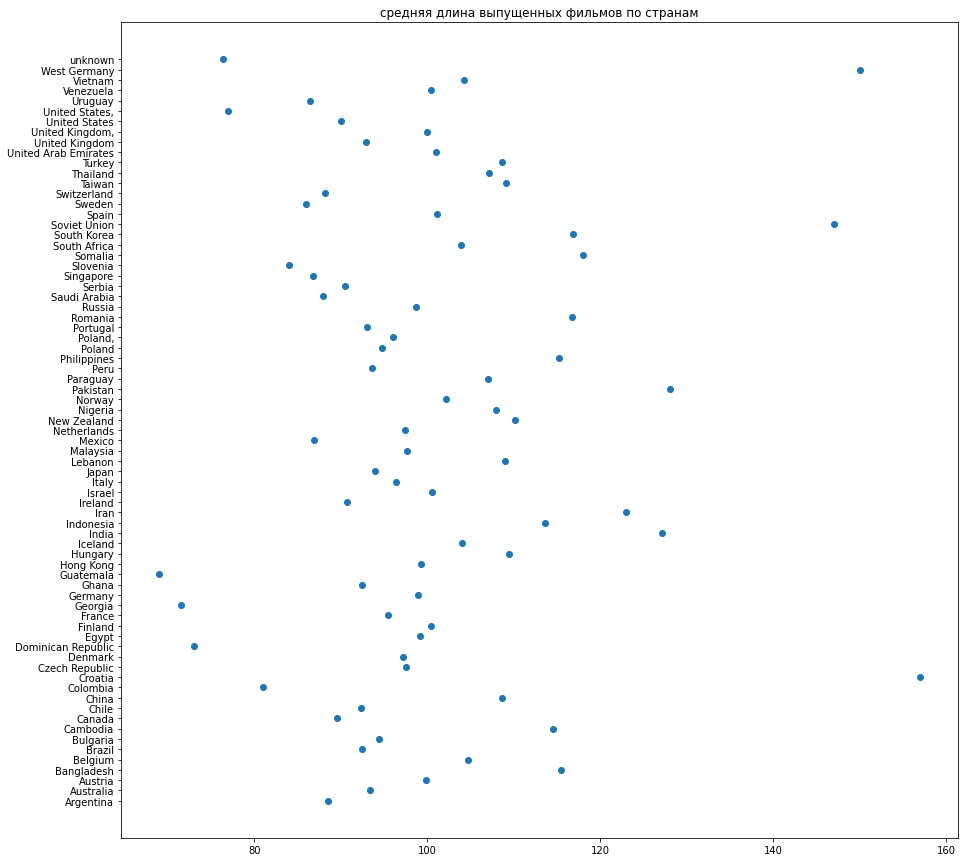

In [428]:
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, title = "средняя длина выпущенных фильмов по странам")
ax.scatter(new.duration_int, new.single_country)

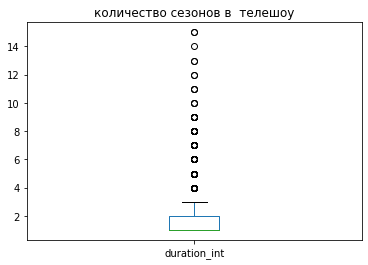

In [419]:
# print(df_shows.duration_int)
new_shows = df_shows[['single_country', 'duration_int', 'release_year']]
new_shows[['duration_int']].plot(kind='box', title = "количество сезонов в  телешоу")

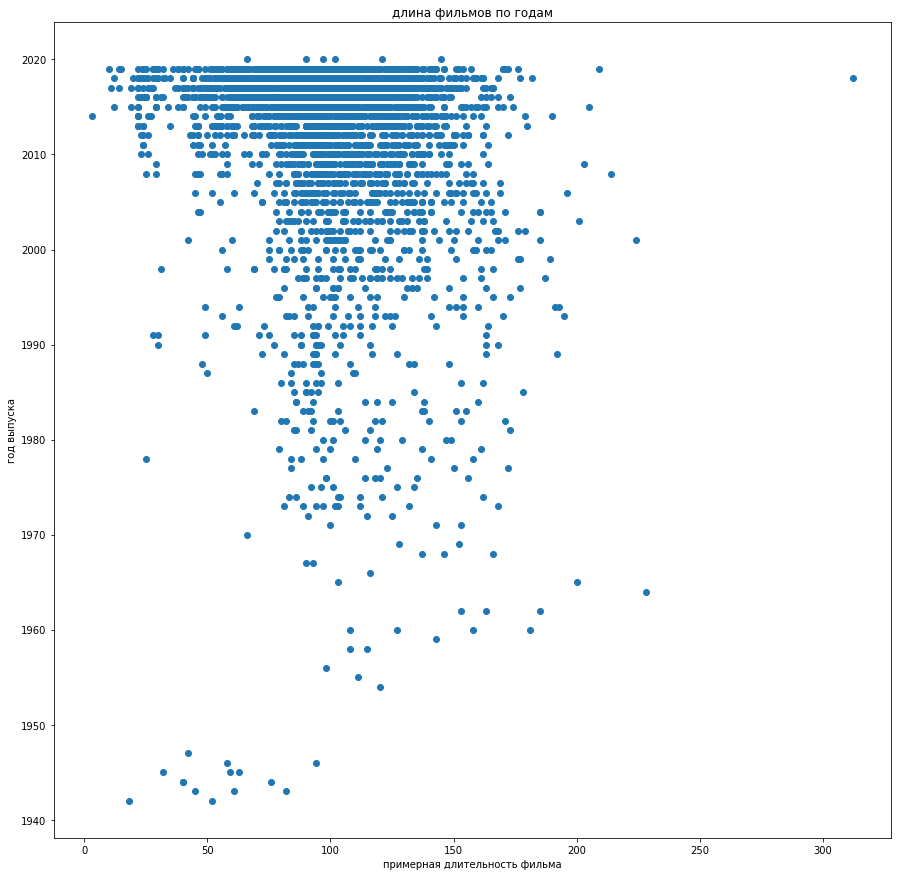

In [423]:
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, xlabel = "примерная длительность фильма", ylabel = 'год выпуска', title = "длина фильмов по годам")
ax.scatter(df_movies.duration_int, df_movies.release_year)

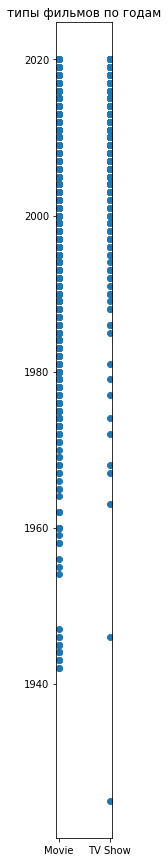

In [426]:
fig = plt.figure(figsize=(1, 15))
ax = fig.add_subplot(111, title = "типы фильмов по годам")
ax.scatter(df.type, df.release_year)


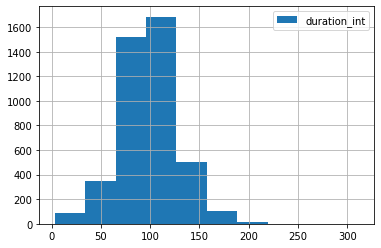

In [413]:
# plt.figure(figsize=(3,4))
df_movies.duration_int.hist(legend=True)

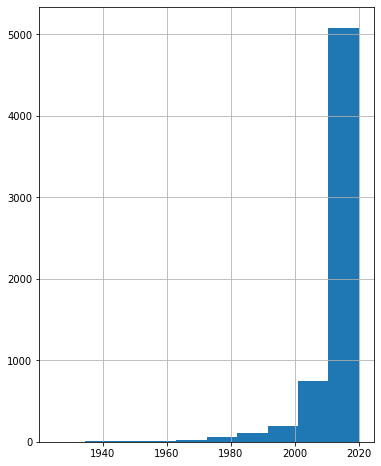

In [425]:
plt.figure(figsize=(6,8))
df.release_year.hist()